## Support Vector Classifier for genre, based on 4 simple features

trained with k fold cross validation and a loop over multple shufflings of the data

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [53]:
# Data import

genres = ["classical", "electronic", "pop", "rock"]

ZC = np.load('../preprocessing/zeroCrossings_frame100ms_hop50ms.npy')
SC = np.load('../preprocessing/spectralCentroid_frame100ms_hop50ms.npy')
SV = np.load('../preprocessing/spectralVariance_frame5000ms_hop2500ms.npy')
ST = np.load('../preprocessing/staticTempoLibrosa.npy')

In [54]:
# Take the median over all frames for each song to have comparable dimensions

ZC = np.nanmedian(ZC, axis=1)
SC = np.nanmedian(SC, axis=1)
SV = np.nanmedian(SV, axis=1)

In [39]:
# OR take the mean in a certain interval

# ZC = np.mean(ZC[:, 100:200], axis=1)
# SC = np.mean(SC[:, 100:200], axis=1)
# SV = np.mean(SV[:, 2:4], axis=1)

In [55]:
# Make dataframe

features_dict_medians = {'ZC': ZC,
                         'SC': SC,
                         'SV': SV,
                         'StaticTempo': ST}
features = pd.DataFrame(data=features_dict_medians)

ones = np.ones(100, dtype='int')
labels_dict = {'label': np.concatenate((ones, ones*2, ones*3, ones*4))}
labels = pd.DataFrame(labels_dict)

In [56]:
# Shuffle

def shuffleData(features, labels):
    n_data = len(features)
    idx = np.random.permutation(n_data)
    features, labels = features.reindex(idx), labels.reindex(idx)
    return features, labels

In [57]:
# K fold Crossvalidation

def kFoldConfusionMatrix(k, features, labels):

    kfold_train_metrics = []
    kfold_test_metrics = []

    confusion_Matrix = np.zeros((4,4))

    # # Drop NaN values
    # NaNidx = np.where(features.isnull().any(axis=1).tolist())[0]
    # # NaNidx = np.isnan(features)[np.isnan(features) == 1].stack().index.tolist()

    # total_input = features.drop(NaNidx)
    # total_labels = labels.drop(NaNidx)

    total_input = features
    total_labels = labels

    cv = KFold(n_splits=k)

    for train_index, test_index in cv.split(total_input):

        train_df, train_labels = total_input.iloc[train_index], total_labels.iloc[train_index]
        test_df, test_labels = total_input.iloc[test_index], total_labels.iloc[test_index]

        # Standardizing data
        mean = train_df.mean()
        std = train_df.std()

        train_df = (train_df - mean) / std
        test_df = (test_df - mean) / std

        # Classifier
        clf = svm.SVC(decision_function_shape='ovo', kernel='linear') # One versus one SVM classifier with RBF kernel
        clf.fit(train_df, train_labels)

        kfold_train_metrics.append(clf.score(train_df, train_labels))
        kfold_test_metrics.append(clf.score(test_df, test_labels))

        confusion_Matrix += confusion_matrix(test_labels, clf.predict(test_df), labels=[1,2,3,4])
        
    return confusion_Matrix

In [63]:
# Doing the actual training of the support vector classifier over multple rounds of shuffeling

confusion_Matrix = np.zeros((4,4))

N_shuffles = 20
k = 10
accuracies = []

for Siter in range(N_shuffles):
    features, labels = shuffleData(features, labels)
    confusion_Matrix += kFoldConfusionMatrix(k, features, labels)
    
    accuracies.append(np.sum(np.eye(4)*confusion_Matrix)/np.sum(confusion_Matrix))

C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed 

C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed 

C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed 

C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed 

C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed 

C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Carsten\anaconda3\envs\musicInformatics\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed 

In [59]:
# Confusion matrix
confusion_Matrix

array([[1621.,  166.,  127.,   86.],
       [ 959.,  133.,  301.,  607.],
       [ 249.,  201.,  518., 1032.],
       [ 184.,  225.,  776.,  815.]])

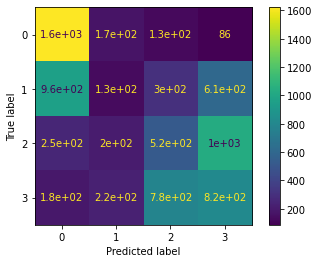

In [60]:
CM = ConfusionMatrixDisplay(confusion_Matrix)
CM.plot()

In [67]:
print(f'Accuracy: {np.mean(accuracies)} +- {np.std(accuracies)}')

Accuracy: 0.38276383522899093 +- 0.004263413333647538
